In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [5]:
df1=pd.read_excel('/home/ayushi/Downloads/RE/R1.xlsx',sheet_name='Sheet1', header=1)

In [6]:
df1.head()

,Calendar Year Month,Product Line Desc (M),Product Class Desc (M),Sales District Desc (M),ABC indicator,Unnamed: 5,USD,USD.1,USD.2,USD.3,USD.4,USD.5,Unnamed: 12
0,201701,Arresters,#,North East Region,##,0.00,0.0,0.00,0.0,536.34,0.0,0.0,536.34
1,201701,Arresters,Blocks,EuropeMidEastAfrica,B,0.00,0.0,0.00,0.0,23040.00,23040.0,15360.0,61440.00
2,201701,Arresters,Blocks,EuropeMidEastAfrica,C,60588.00,60588.0,0.00,0.0,25486.20,46656.0,190256.0,322986.20
3,201701,Arresters,Blocks,North East Region,C,0.00,0.0,0.00,0.0,5691.00,0.0,0.0,5691.00
4,201701,Arresters,Distribution Arresters,APAC,1,9963.52,0.0,9963.52,0.0,0.00,0.0,0.0,9963.52


In [7]:
df1 = df1.iloc[:-1] # deleting last row

#df1['Calendar Year Month']=datetime.datetime.strptime(df1['Calendar Year Month'],format="%Y%m")
df1['Calendar Year Month']=pd.to_datetime(df1['Calendar Year Month'],format='%Y%m')

df1=df1[df1['Product Line Desc (M)'].isin(['Arresters','Cable Accessories', 'Connectors','Construction'
                                     ,'Insulators','Safety Products','Switching & Fusing'])]

df1=df1[df1['Product Class Desc (M)']!='#']

df1=df1[df1['ABC indicator']!='##']

df1=df1[['Calendar Year Month','Product Line Desc (M)','Product Class Desc (M)','Sales District Desc (M) ','ABC indicator','Unnamed: 5']]

df1.index=df1['Calendar Year Month']
df1.drop('Calendar Year Month',axis=1,inplace=True)

In [8]:
arresters=df1[df1['Product Line Desc (M)']=='Arresters']

In [9]:
arresters['Product Class Desc (M)'].unique()

array(['Blocks', 'Distribution Arresters', 'Substation HC Arresters',
       'Substation SC Arresters', 'Transmission Arresters'], dtype=object)

In [10]:
arresters['Sales District Desc (M) '].unique()

array(['EuropeMidEastAfrica', 'North East Region', 'APAC',
       'CANADA UTILITY', 'Communication - East', 'Communication - West',
       'Greater China', 'House Accounts', 'Latin America',
       'NORTH CENTRAL REGION', 'SOUTH CENTRAL REGION', 'SOUTHEAST REGION',
       'West Region', 'HOUSE INTERNATIONAL'], dtype=object)

In [11]:
arresters['ABC indicator'].unique()

array(['B', 'C', '1', 'A', 'D'], dtype=object)

In [12]:
arresters.drop('Product Line Desc (M)',axis=1,inplace=True)

/home/ayushi/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [13]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
arresters['Sales District Desc (M) '] = le.fit_transform(arresters['Sales District Desc (M) '])

one_hot1 = pd.get_dummies(arresters['Product Class Desc (M)'])

one_hot2 = pd.get_dummies(arresters['ABC indicator'])

arresters = pd.concat([arresters, one_hot1], axis=1)

arresters=pd.concat([arresters,one_hot2], axis=1)

arresters.drop(['Product Class Desc (M)','ABC indicator'],axis=1,inplace=True)

/home/ayushi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
arr_train=arresters[:round(len(arresters)*0.8)]
arr_test=arresters[round(len(arresters)*0.8):]
arr_train.head()

,Sales District Desc (M),Unnamed: 5,Blocks,Distribution Arresters,Substation HC Arresters,Substation SC Arresters,Transmission Arresters,1,A,B,C,D
Calendar Year Month,,,,,,,,,,,,
2017-01-01,4,0.00,1,0,0,0,0,0,0,1,0,0
2017-01-01,4,60588.00,1,0,0,0,0,0,0,0,1,0
2017-01-01,10,0.00,1,0,0,0,0,0,0,0,1,0
2017-01-01,0,9963.52,0,1,0,0,0,1,0,0,0,0
2017-01-01,0,9100.77,0,1,0,0,0,0,0,1,0,0


In [21]:
model=ARIMA(endog=arr_train['Unnamed: 5'],exog=arr_train[['Sales District Desc (M) ', 'Blocks',
       'Distribution Arresters', 'Substation HC Arresters',
       'Substation SC Arresters', 'Transmission Arresters', '1', 'A', 'B', 'C',
       'D']],
      order=(5,0,5))


/home/ayushi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [22]:
model_fit=model.fit()
model_fit.aic

/home/ayushi/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


57134.266931045495

In [23]:
predictions=model_fit.predict(start=2501, end=3126,exog=arresters[['Sales District Desc (M) ', 'Blocks',
       'Distribution Arresters', 'Substation HC Arresters',
       'Substation SC Arresters', 'Transmission Arresters', '1', 'A', 'B', 'C',
       'D']])

/home/ayushi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [24]:
predictions

2501     7236.323306
2502     6672.276116
2503     5310.960599
2504    11718.444222
2505    19352.587583
2506    17889.754807
2507     7764.426403
2508    13655.960801
2509    19447.400116
2510    18580.692794
2511    14103.125441
2512    15309.106585
2513    13193.009660
2514    15783.930426
2515    15349.798956
2516    15047.223431
2517     7070.654482
2518    14906.450657
2519    14370.137381
2520     5819.450240
2521    12726.588566
2522    16923.658401
2523     4493.943923
2524     5218.594904
2525    10706.384326
2526    15841.636334
2527     5022.407808
2528     5361.941811
2529     9072.958339
2530    14117.276690
            ...     
3097     2116.337549
3098     6964.520076
3099     8946.944313
3100     5129.961841
3101    10482.416572
3102    17769.726150
3103    19527.909142
3104    13546.310003
3105    13063.309473
3106    17324.000176
3107    19043.468810
3108     7653.533393
3109    11517.854338
3110    16096.394813
3111     7420.028526
3112    10328.189698
3113    14853

# Sarimax

In [ ]:
columns=

In [44]:
arr_train.dtypes

Sales District Desc (M)       int64
Unnamed: 5                  float64
Blocks                        uint8
Distribution Arresters        uint8
Substation HC Arresters       uint8
Substation SC Arresters       uint8
Transmission Arresters        uint8
1                             uint8
A                             uint8
B                             uint8
C                             uint8
D                             uint8
dtype: object

In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [35]:
model_sa=SARIMAX(endog=arr_train['Unnamed: 5'],exog=arr_train[['Sales District Desc (M) ', 'Blocks',
       'Distribution Arresters', 'Substation HC Arresters',
       'Substation SC Arresters', 'Transmission Arresters', '1', 'A', 'B', 'C',
       'D']],
      order=(1, 0, 0), seasonal_order=(1, 1, 1, 1), trend=None)

/home/ayushi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
model_sa=SARIMAX(endog=arr_train['Unnamed: 5'],exog=ExogenousFeature_train.values.astype('float64'),
      order=(1, 0, 0), seasonal_order=(1, 1, 1, 1), trend=None)

In [36]:
model_sa_fit=model_sa.fit()

In [37]:
model_sa_fit.aic

57311.95152584059

In [43]:
predictions=model_sa_fit.get_prediction(start=2501,dynamic=False,exog=['Sales District Desc (M) ', 'Blocks',
       'Distribution Arresters', 'Substation HC Arresters',
       'Substation SC Arresters', 'Transmission Arresters', '1', 'A', 'B', 'C',
       'D'])

ValueError: Provided exogenous values are not of the appropriate shape. Required (1, 11), got (11,).

# for Univariate

In [19]:
t=arresters['Unnamed: 5']
t=pd.DataFrame(t)

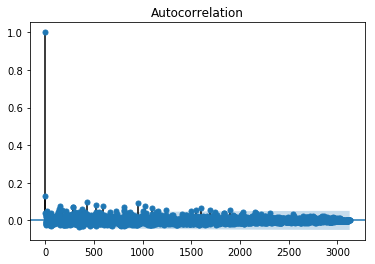

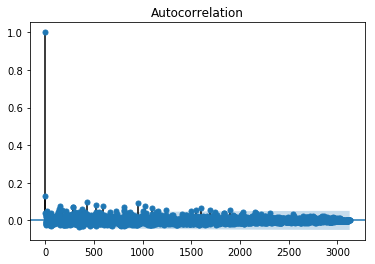

In [28]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(t)

this plot shows that data is stationary because the values decreased instantly

#  Stationarity
mean, variance, covariance are same over period of time. It is used to remove trend in the data

our data is already stationary , so we dont need to do any differncing , otherwise it can be done as below
Converting series to stationarity

t_diff=t.diff(periods=1)
integrated of order =1, denoted by d( for diff), it is one of the parameter of ARIMAmodel

t_diff=t_diff[1:]



In [29]:
train=t[:round(len(t)*0.8)]
test=t[round(len(t)*0.8):]

# AR Model

In [30]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [31]:
model_ar = AR(train)
model_ar_fit = model_ar.fit()

/home/ayushi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [32]:
predictions=model_ar_fit.predict(start=2501, end=3126)
predictions=pd.DataFrame(predictions)

/home/ayushi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


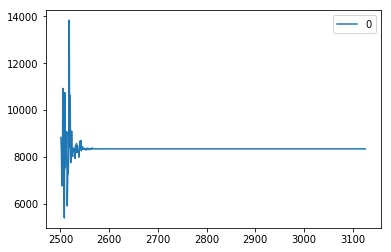

In [33]:
sns.lineplot(data=predictions)
# sns.lineplot(data=test)

# ARIMA Model

In [34]:
from statsmodels.tsa.arima_model import ARIMA

In [38]:
# p,d,q 
# p= periods taken for autoregressive model
# d= order of integrated, difference
# q= periods in moving average model
model_arima= ARIMA(train, order=(1,1,1))
model_arima_fit= model_arima.fit()
print(model_arima_fit.aic)

57213.31353924744


In [40]:
import itertools
p=d=q=range(1,2)
pdq=list(itertools.product(p,d,q))

In [41]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima= ARIMA(train, order=param)
        model_arima_fit= model_arima.fit()
        print(params,model_arima_fit.aic)
    except:
        continue

In [ ]:
model_arima_fit.forecast(steps=625)[0]

In [46]:
arresters.columns

Index(['Product Class Desc (M)', 'Sales District Desc (M) ', 'ABC indicator',
       'Unnamed: 5'],
      dtype='object')

In [47]:
data=arr_train[['Sales District Desc (M) ', 'Blocks',
       'Distribution Arresters', 'Substation HC Arresters',
       'Substation SC Arresters', 'Transmission Arresters', '1', 'A', 'B', 'C',
       'D']]
target=arr_train['Unnamed: 5']

In [64]:
# create and fit a ridge regression model, testing each alpha
model=ARIMA(arr_train,order=(3,0,2))
grid = GridSearchCV(estimator=model, param_grid=param)
grid.fit(data, target)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)


/home/ayushi/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


TypeError: Cannot clone object '<statsmodels.tsa.arima_model.ARMA object at 0x7f3196e77278>' (type <class 'statsmodels.tsa.arima_model.ARMA'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' methods.

In [45]:
param={'p':[0,1,2,3,4,5,6,7,8,9],'d':[0,1,2,3,4,5,6,7,8,9],'q':[0,1,2,3,4,5,6,7,8,9]}

In [46]:
param

{'p': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 'd': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 'q': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}